In [32]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.impute import KNNImputer

In [15]:
ls

Diamond+Data-新.xlsx               draw the histogram/
carbonate1.ipynb                   res.xlsx
carbonate2.ipynb                   主量10w.xlsx
carbonate3.ipynb                   微量7000（去斜杠）.xlsx
carbonate4.ipynb                   分布图/
carbonates-资料/                   录入处理.ipynb
carbonates5.ipynb                  测试数据分类总表8.30.xlsx
carbonates_10.3.ipynb


In [16]:
df = pd.read_excel("微量7000（去斜杠）.xlsx")
df.head()

,数据质量,是否交代,CITATION,SAMPLE NAME,TECTONIC SETTING,LOCATION,LOCATION COMMENT,LATITUDE (MIN.),LATITUDE (MAX.),LONGITUDE (MIN.),LONGITUDE (MAX.),LAND/SEA (SAMPLING),ELEVATION (MIN.),ELEVATION (MAX.),ROCK NAME,ROCK TEXTURE,DRILLING DEPTH (MIN.),DRILLING DEPTH (MAX.),ALTERATION,MINERAL,SPOT,CRYSTAL,RIM/CORE (MINERAL GRAINS),PRIMARY/SECONDARY,SC(PPM),TI(PPM),V(PPM),CR(PPM),NI(PPM),RB(PPM),SR(PPM),Y(PPM),ZR(PPM),NB(PPM),BA(PPM),LA(PPM),CE(PPM),PR(PPM),ND(PPM),SM(PPM),EU(PPM),GD(PPM),TB(PPM),DY(PPM),HO(PPM),ER(PPM),TM(PPM),YB(PPM),LU(PPM),HF(PPM),TA(PPM),PB(PPM),TH(PPM),U(PPM),总计数量
0,A,222.0,[23616] LI XIAOHUI (2020),samp. C11,CONVERGENT MARGIN,RYUKYU ARC / OKINAWA TROUGH,IHEYA RIDGE,27.5193,27.5193,126.9378,126.9378,subaquatic,-1376.0,-1376.0,RHYOLITE,NaN,NaN,NaN,NaN,CLINOPYROXENE,C11-7-1,NaN,NaN,secondary,225.61,1541.00,43.63,3.02,6.71,2.70,12.50,91.59,44.93,0.148,10.55,4.970,21.66,4.270,29.49,11.50,1.760,15.15,2.720,18.46,3.720,10.75,1.400,10.43,1.570,1.86,0.012,0.380,0.2170,0.071,44
1,A,222.0,[23616] LI XIAOHUI (2020),samp. C11,CONVERGENT MARGIN,RYUKYU ARC / OKINAWA TROUGH,IHEYA RIDGE,27.5193,27.5193,126.9378,126.9378,subaquatic,-1376.0,-1376.0,RHYOLITE,NaN,NaN,NaN,NaN,CLINOPYROXENE,C11-4-1,NaN,NaN,secondary,241.92,1125.90,30.16,0.00,5.50,0.00,8.72,92.70,31.37,0.032,0.35,3.920,18.66,4.000,27.85,11.61,1.363,14.52,2.660,18.32,3.820,10.53,1.517,11.51,1.658,1.40,0.000,0.000,0.0268,0.000,44
2,A,222.0,[23616] LI XIAOHUI (2020),samp. C11,CONVERGENT MARGIN,RYUKYU ARC / OKINAWA TROUGH,IHEYA RIDGE,27.5193,27.5193,126.9378,126.9378,subaquatic,-1376.0,-1376.0,RHYOLITE,NaN,NaN,NaN,NaN,CLINOPYROXENE,C11-5-2,NaN,NaN,secondary,256.31,1291.93,35.77,0.00,5.69,0.00,15.27,106.65,36.76,0.000,0.00,13.540,44.40,7.450,46.84,15.92,1.970,19.02,3.340,21.59,4.400,11.98,1.650,12.18,1.720,1.77,0.000,0.133,0.1600,0.056,44
3,A,222.0,[23616] LI XIAOHUI (2020),samp. R2,CONVERGENT MARGIN,RYUKYU ARC / OKINAWA TROUGH,IHEYA RIDGE,27.5412,27.5412,126.9770,126.9770,subaquatic,-1309.7,-1309.7,BASALT,NaN,NaN,NaN,NaN,CLINOPYROXENE,R2-4-2,NaN,NaN,secondary,150.61,3502.97,400.76,3354.65,92.08,0.00,17.57,15.11,13.19,0.028,0.75,0.606,2.84,0.559,4.23,2.00,0.670,2.41,0.431,2.69,0.618,1.60,0.210,1.66,0.197,0.70,0.071,0.000,0.3070,0.000,44
4,A,222.0,[23616] LI XIAOHUI (2020),samp. T2,CONVERGENT MARGIN,RYUKYU ARC / OKINAWA TROUGH,IHEYA RIDGE,27.5460,27.5460,126.9753,126.9753,subaquatic,-1238.0,-1238.0,ANDESITE,NaN,NaN,NaN,NaN,CLINOPYROXENE,T2-2-2,NaN,NaN,secondary,164.50,3881.26,202.19,27.78,1.31,4.03,24.51,66.32,59.23,0.680,24.57,4.310,15.91,3.030,21.22,8.28,1.830,11.07,1.840,12.83,2.700,7.22,0.987,7.38,0.875,2.64,0.031,0.550,0.4800,0.134,44


In [17]:
df.columns

Index(['数据质量', '是否交代', 'CITATION', 'SAMPLE NAME', 'TECTONIC SETTING',
       'LOCATION', 'LOCATION COMMENT', 'LATITUDE (MIN.)', 'LATITUDE (MAX.)',
       'LONGITUDE (MIN.)', 'LONGITUDE (MAX.)', 'LAND/SEA (SAMPLING)',
       'ELEVATION (MIN.)', 'ELEVATION (MAX.)', 'ROCK NAME', 'ROCK TEXTURE',
       'DRILLING DEPTH (MIN.)', 'DRILLING DEPTH (MAX.)', 'ALTERATION',
       'MINERAL', 'SPOT', 'CRYSTAL', 'RIM/CORE (MINERAL GRAINS)',
       'PRIMARY/SECONDARY', 'SC(PPM)', 'TI(PPM)', 'V(PPM)', 'CR(PPM)',
       'NI(PPM)', 'RB(PPM)', 'SR(PPM)', 'Y(PPM)', 'ZR(PPM)', 'NB(PPM)',
       'BA(PPM)', 'LA(PPM)', 'CE(PPM)', 'PR(PPM)', 'ND(PPM)', 'SM(PPM)',
       'EU(PPM)', 'GD(PPM)', 'TB(PPM)', 'DY(PPM)', 'HO(PPM)', 'ER(PPM)',
       'TM(PPM)', 'YB(PPM)', 'LU(PPM)', 'HF(PPM)', 'TA(PPM)', 'PB(PPM)',
       'TH(PPM)', 'U(PPM)', '总计数量'],
      dtype='object')

In [7]:
def correlation_plot(col, df):
    '''
    Input: 
        col: A list of columns that need to plot
        df: The dataframe 
    Output:
        A heatmap describing the correlation between the required columns
    '''
    plot_df = df[col]
    plot_df_cor = plot_df.corr()
    plt.figure(figsize=(20, 20))
    sns.heatmap(plot_df_cor, cmap = 'coolwarm', annot=True, linewidths=.5)

In [8]:
def distribution_plot(col, df):
    '''
    Input: 
        col: A list of columns that need to plot
        df: The dataframe 
    Output:
        A large graph containing the respective distribution subplots of the required columns
    '''
    n = int(np.sqrt(len(col))) + 1
    plt.figure(figsize=(n*2, n*2))
    for i in range(len(col)):
        plt.subplot(n, n, i+1)
        plt.hist(df[col[i]])
        plt.title(col[i])
    plt.tight_layout()

In [18]:
num_cols = ['SC(PPM)', 'TI(PPM)', 'V(PPM)', 'CR(PPM)',
       'NI(PPM)', 'RB(PPM)', 'SR(PPM)', 'Y(PPM)', 'ZR(PPM)', 'NB(PPM)',
       'BA(PPM)', 'LA(PPM)', 'CE(PPM)', 'PR(PPM)', 'ND(PPM)', 'SM(PPM)',
       'EU(PPM)', 'GD(PPM)', 'TB(PPM)', 'DY(PPM)', 'HO(PPM)', 'ER(PPM)',
       'TM(PPM)', 'YB(PPM)', 'LU(PPM)', 'HF(PPM)', 'TA(PPM)', 'PB(PPM)',
       'TH(PPM)', 'U(PPM)', '总计数量']

In [19]:
df[num_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7344 entries, 0 to 7343
Data columns (total 31 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SC(PPM)  6779 non-null   float64
 1   TI(PPM)  5149 non-null   float64
 2   V(PPM)   7032 non-null   float64
 3   CR(PPM)  5820 non-null   float64
 4   NI(PPM)  6451 non-null   float64
 5   RB(PPM)  6038 non-null   float64
 6   SR(PPM)  7339 non-null   float64
 7   Y(PPM)   7337 non-null   float64
 8   ZR(PPM)  7342 non-null   float64
 9   NB(PPM)  7182 non-null   float64
 10  BA(PPM)  6603 non-null   float64
 11  LA(PPM)  7316 non-null   float64
 12  CE(PPM)  7320 non-null   float64
 13  PR(PPM)  7296 non-null   float64
 14  ND(PPM)  7322 non-null   float64
 15  SM(PPM)  7321 non-null   float64
 16  EU(PPM)  7342 non-null   float64
 17  GD(PPM)  7344 non-null   float64
 18  TB(PPM)  7022 non-null   float64
 19  DY(PPM)  7343 non-null   float64
 20  HO(PPM)  7096 non-null   float64
 21  ER(PPM)  7331 

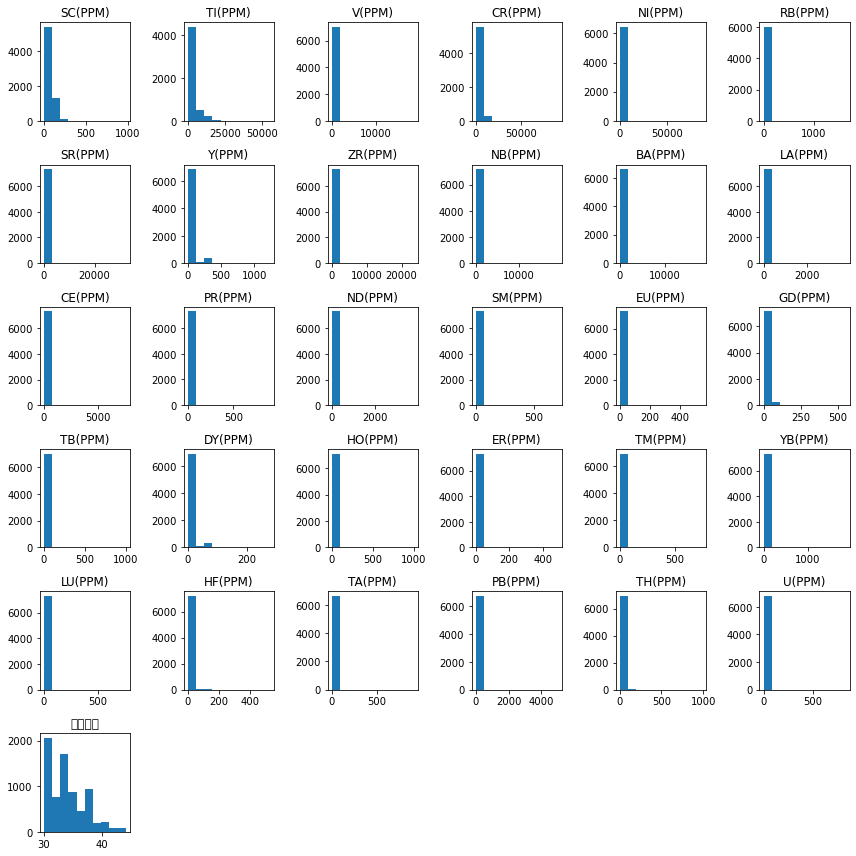

In [22]:
distribution_plot(num_cols, df)

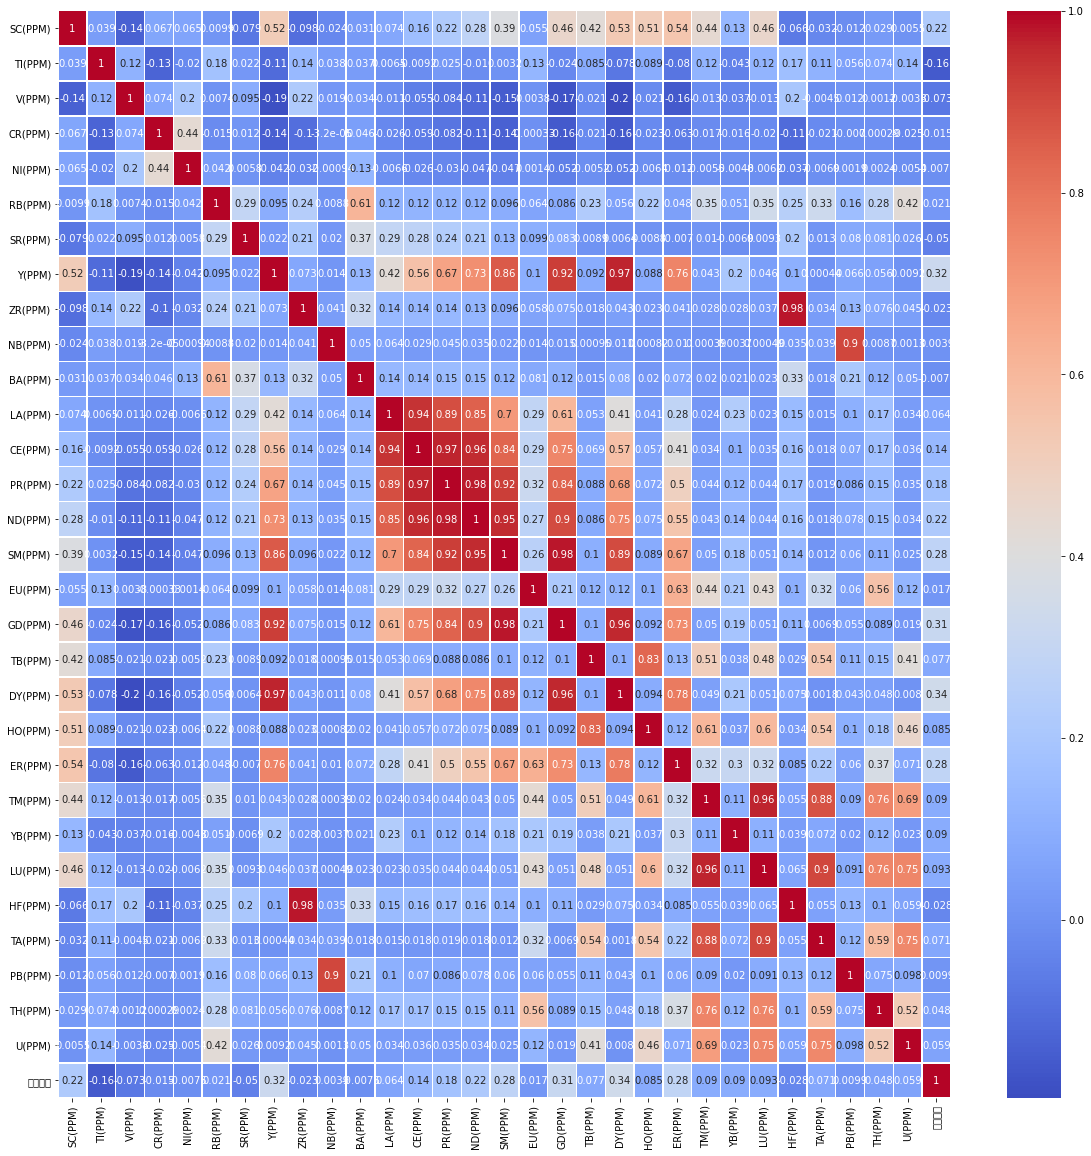

In [23]:
correlation_plot(num_cols, df)

In [27]:
def logged_distribution_plot(col, df):
    '''
    Input: 
        col: A list of columns that need to plot
        df: The dataframe 
    Output:
        A large graph containing the respective distribution subplots after log transformation of the required columns
    '''
    n = int(np.sqrt(len(col))) + 1
    plt.figure(figsize=(n*2, n*2))
    for i in range(len(col)):
        plt.subplot(n, n, i+1)
        plt.hist(df[col[i]].map(lambda x: np.log(x+1)))
        plt.title(col[i])
    plt.tight_layout()

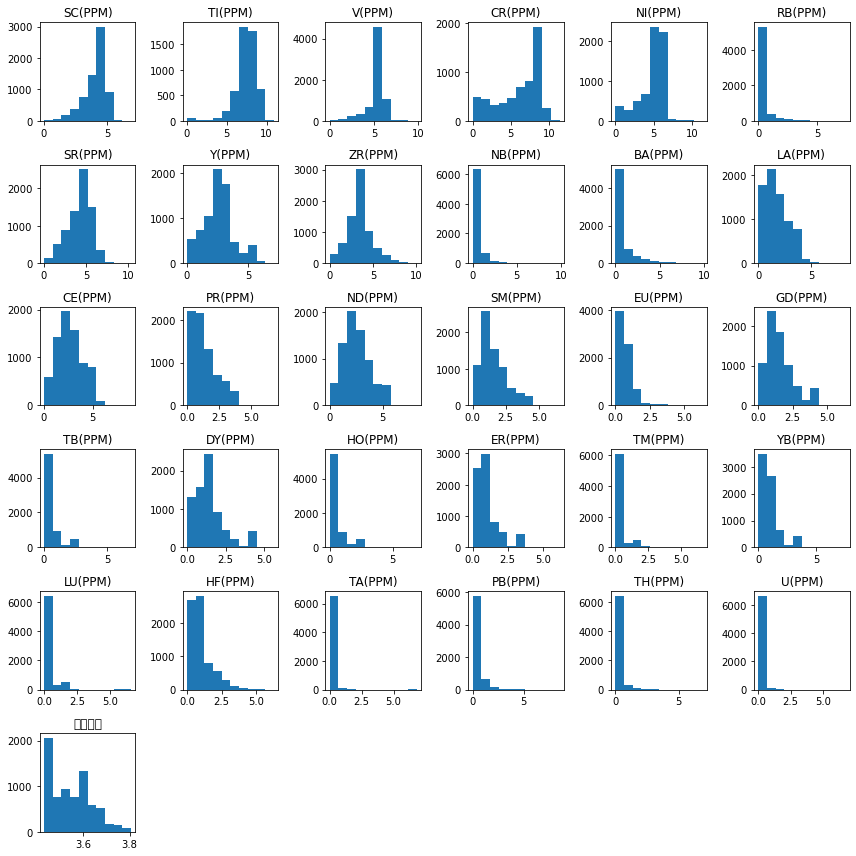

In [28]:
logged_distribution_plot(num_cols, df)

In [31]:
df[num_cols].isnull().mean().sort_values(ascending=False)

TI(PPM)    0.298883
CR(PPM)    0.207516
RB(PPM)    0.177832
NI(PPM)    0.121596
BA(PPM)    0.100899
TA(PPM)    0.094635
PB(PPM)    0.083197
SC(PPM)    0.076934
U(PPM)     0.073802
TM(PPM)    0.054602
TH(PPM)    0.053105
TB(PPM)    0.043845
V(PPM)     0.042484
HO(PPM)    0.033769
NB(PPM)    0.022059
HF(PPM)    0.013889
PR(PPM)    0.006536
LU(PPM)    0.003949
LA(PPM)    0.003813
CE(PPM)    0.003268
SM(PPM)    0.003132
ND(PPM)    0.002996
YB(PPM)    0.002451
ER(PPM)    0.001770
Y(PPM)     0.000953
SR(PPM)    0.000681
ZR(PPM)    0.000272
EU(PPM)    0.000272
DY(PPM)    0.000136
GD(PPM)    0.000000
总计数量       0.000000
dtype: float64

In [35]:
df_miss = df[num_cols[:-1]]
df_miss.head()

,SC(PPM),TI(PPM),V(PPM),CR(PPM),NI(PPM),RB(PPM),SR(PPM),Y(PPM),ZR(PPM),NB(PPM),BA(PPM),LA(PPM),CE(PPM),PR(PPM),ND(PPM),SM(PPM),EU(PPM),GD(PPM),TB(PPM),DY(PPM),HO(PPM),ER(PPM),TM(PPM),YB(PPM),LU(PPM),HF(PPM),TA(PPM),PB(PPM),TH(PPM),U(PPM)
0,225.61,1541.00,43.63,3.02,6.71,2.70,12.50,91.59,44.93,0.148,10.55,4.970,21.66,4.270,29.49,11.50,1.760,15.15,2.720,18.46,3.720,10.75,1.400,10.43,1.570,1.86,0.012,0.380,0.2170,0.071
1,241.92,1125.90,30.16,0.00,5.50,0.00,8.72,92.70,31.37,0.032,0.35,3.920,18.66,4.000,27.85,11.61,1.363,14.52,2.660,18.32,3.820,10.53,1.517,11.51,1.658,1.40,0.000,0.000,0.0268,0.000
2,256.31,1291.93,35.77,0.00,5.69,0.00,15.27,106.65,36.76,0.000,0.00,13.540,44.40,7.450,46.84,15.92,1.970,19.02,3.340,21.59,4.400,11.98,1.650,12.18,1.720,1.77,0.000,0.133,0.1600,0.056
3,150.61,3502.97,400.76,3354.65,92.08,0.00,17.57,15.11,13.19,0.028,0.75,0.606,2.84,0.559,4.23,2.00,0.670,2.41,0.431,2.69,0.618,1.60,0.210,1.66,0.197,0.70,0.071,0.000,0.3070,0.000
4,164.50,3881.26,202.19,27.78,1.31,4.03,24.51,66.32,59.23,0.680,24.57,4.310,15.91,3.030,21.22,8.28,1.830,11.07,1.840,12.83,2.700,7.22,0.987,7.38,0.875,2.64,0.031,0.550,0.4800,0.134


In [36]:
df_miss.shape

(7344, 30)

### KNN Imputation

In [37]:
knn_imputer = KNNImputer(n_neighbors=5, weights='distance')
df_miss_knn = knn_imputer.fit_transform(df_miss)
df_miss_knn = pd.DataFrame(df_miss_knn, columns=num_cols[:-1])

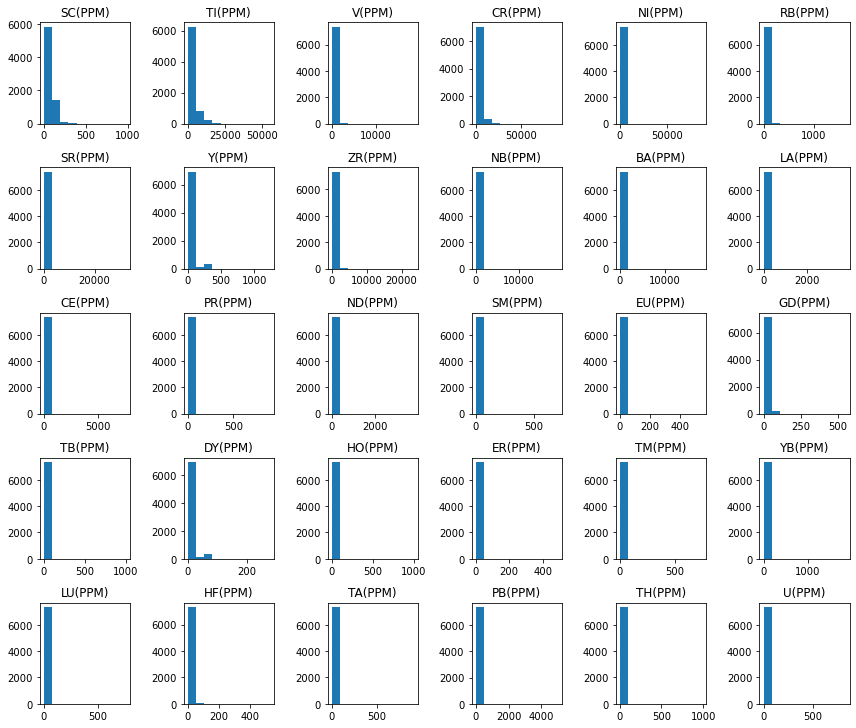

In [38]:
distribution_plot(num_cols[:-1], df_miss_knn)

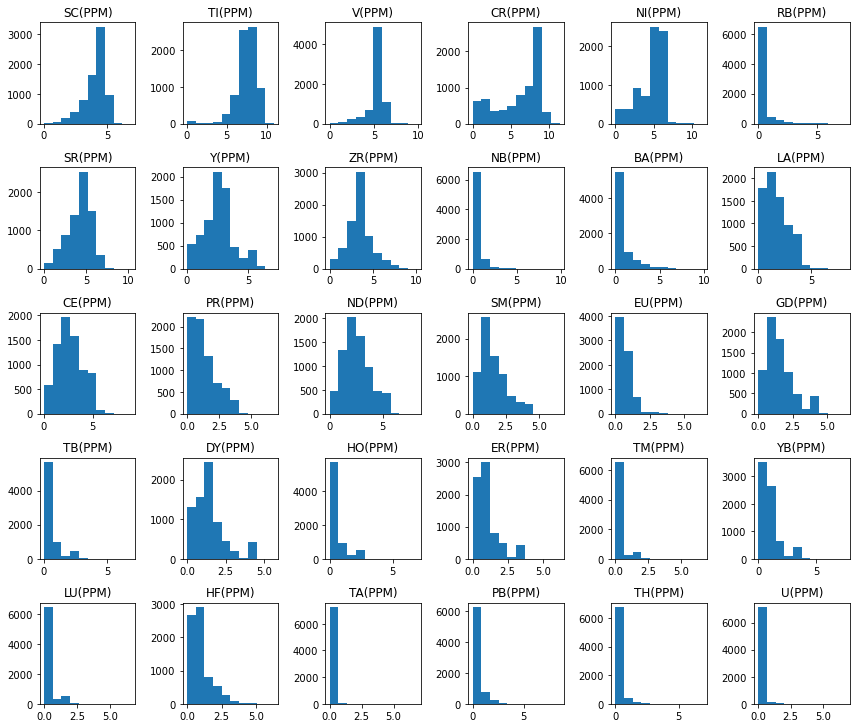

In [39]:
logged_distribution_plot(num_cols[:-1], df_miss_knn)

### Median Imputation

In [40]:
df_miss_median = df_miss.fillna(df_miss.median())

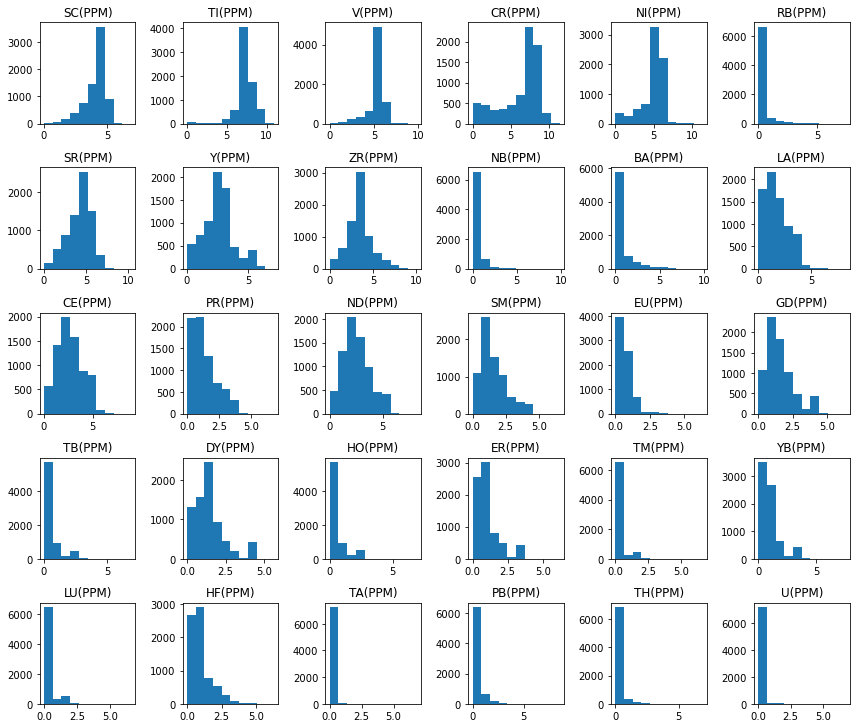

In [41]:
logged_distribution_plot(num_cols[:-1], df_miss_median)

In [112]:
from scipy.stats import wilcoxon, kruskal

In [43]:
stat, pval = wilcoxon(df_miss['SC(PPM)'], df_miss_knn['SC(PPM)'])
stat, pval

(0.0, 3.0879745555462677e-94)

In [45]:
stat, pval = wilcoxon(x = df_miss['SC(PPM)'], y = df_miss_knn['SC(PPM)'], alternative='less')
stat, pval

(0.0, 1.5439872777731338e-94)

The median is negative.

In [46]:
test_cols = num_cols[:-1]

In [50]:
len(test_cols)

30

### Wilcoxon test

In [60]:
same_counts = 0
same_cols = []
for c in test_cols:
    try: 
        stat, pval = wilcoxon(df_miss[c], df_miss_knn[c])
        print(c)
        print(f'stas: {stat}, pval: {pval}')
        if pval < 0.05:
            print('Different!')
        else:
            same_counts += 1
            same_cols.append(c)
        print('=========================================================')
    except:
        print('WARNING: ', c, '-> x - y is zero for all elements')
        print('=========================================================')

print(f'There are {same_counts} features pass the test')
print(f'They are: {same_cols}')

SC(PPM)
stas: 0.0, pval: 3.0879745555462677e-94
Different!
TI(PPM)
stas: 0.0, pval: 0.0
Different!
V(PPM)
stas: 0.0, pval: 6.628221790169507e-53
Different!
CR(PPM)
stas: 0.0, pval: 1.2352839943394532e-250
Different!
NI(PPM)
stas: 0.0, pval: 9.385712888767442e-148
Different!
RB(PPM)
stas: 0.0, pval: 4.253937467187471e-215
Different!
SR(PPM)
stas: 0.0, pval: 0.043114446783075355
Different!
Y(PPM)
stas: 0.0, pval: 0.017960477526078766
Different!
ZR(PPM)
stas: 0.0, pval: 0.17971249487899976
NB(PPM)
stas: 0.0, pval: 2.4599268408361667e-28
Different!
BA(PPM)
stas: 0.0, pval: 5.856282732013609e-123
Different!
LA(PPM)
stas: 0.0, pval: 3.789619441580871e-06
Different!
CE(PPM)
stas: 0.0, pval: 1.821529714896801e-05
Different!
PR(PPM)
stas: 0.0, pval: 1.6310100430962223e-09
Different!
ND(PPM)
stas: 0.0, pval: 4.009964816469138e-05
Different!
SM(PPM)
stas: 0.0, pval: 2.7015948487105512e-05
Different!
EU(PPM)
stas: 0.0, pval: 0.17971249487899976
TB(PPM)
stas: 0.0, pval: 1.53463496622767e-54
Differe

In [59]:
same_counts = 0
same_cols = []
for c in test_cols:
    try: 
        stat, pval = wilcoxon(df_miss[c], df_miss_median[c])
        print(c)
        print(f'stas: {stat}, pval: {pval}')
        if pval < 0.05:
            print('Different!')
        else:
            same_counts += 1
            same_cols.append(c)
        print('=========================================================')
    except:
        print('WARNING: ', c, '-> x - y is zero for all elements')
        print('=========================================================')

print(f'There are {same_counts} features pass the test')
print(f'They are: {same_cols}')

SC(PPM)
stas: 0.0, pval: 3.0879745555462677e-94
Different!
TI(PPM)
stas: 0.0, pval: 0.0
Different!
V(PPM)
stas: 0.0, pval: 6.628221790169507e-53
Different!
CR(PPM)
stas: 0.0, pval: 1.2352839943394532e-250
Different!
NI(PPM)
stas: 0.0, pval: 9.385712888767442e-148
Different!
RB(PPM)
stas: 0.0, pval: 4.253937467187471e-215
Different!
SR(PPM)
stas: 0.0, pval: 0.043114446783075355
Different!
Y(PPM)
stas: 0.0, pval: 0.017960477526078766
Different!
ZR(PPM)
stas: 0.0, pval: 0.17971249487899976
NB(PPM)
stas: 0.0, pval: 2.4599268408361667e-28
Different!
BA(PPM)
stas: 0.0, pval: 5.856282732013609e-123
Different!
LA(PPM)
stas: 0.0, pval: 3.789619441580871e-06
Different!
CE(PPM)
stas: 0.0, pval: 1.821529714896801e-05
Different!
PR(PPM)
stas: 0.0, pval: 1.6310100430962223e-09
Different!
ND(PPM)
stas: 0.0, pval: 4.009964816469138e-05
Different!
SM(PPM)
stas: 0.0, pval: 2.7015948487105512e-05
Different!
EU(PPM)
stas: 0.0, pval: 0.17971249487899976
TB(PPM)
stas: 0.0, pval: 1.53463496622767e-54
Differe

### Kruskal-Wallis test

In [115]:
same_counts = 0
same_cols = []
for c in test_cols:
#     try: 
    stat, pval = kruskal(df_miss[c], df_miss_median[c], nan_policy = 'omit')
    print(c)
    print(f'stas: {stat}, pval: {pval}')
    if pval < 0.05:
        print('Different!')
    else:
        same_counts += 1
        same_cols.append(c)
    print('=========================================================')
#     except:
#         print('WARNING: ', c, '-> x - y is zero for all elements')
#         print('=========================================================')

print(f'There are {same_counts} features pass the test')
print(f'They are: {same_cols}')

SC(PPM)
stas: 0.0, pval: 1.0
TI(PPM)
stas: 0.0, pval: 1.0
V(PPM)
stas: 0.0, pval: 1.0
CR(PPM)
stas: 0.0, pval: 1.0
NI(PPM)
stas: 0.0, pval: 1.0
RB(PPM)
stas: 0.00021800334789573916, pval: 0.9882197132034076
SR(PPM)
stas: 0.0, pval: 1.0
Y(PPM)
stas: 1.680746588142872e-09, pval: 0.9999672891988824
ZR(PPM)
stas: 0.0, pval: 1.0
NB(PPM)
stas: 9.248711032451377e-07, pval: 0.999232672788376
BA(PPM)
stas: 9.769690512407357e-06, pval: 0.9975060958527431
LA(PPM)
stas: 0.0, pval: 1.0
CE(PPM)
stas: 0.0, pval: 1.0
PR(PPM)
stas: 0.0, pval: 1.0
ND(PPM)
stas: 0.0, pval: 1.0
SM(PPM)
stas: 0.0, pval: 1.0
EU(PPM)
stas: 0.0, pval: 1.0
GD(PPM)
stas: 0.0, pval: 1.0
TB(PPM)
stas: 0.0, pval: 1.0
DY(PPM)
stas: 5.820770442451766e-11, pval: 0.9999939126216201
HO(PPM)
stas: 0.0, pval: 1.0
ER(PPM)
stas: 0.0, pval: 1.0
TM(PPM)
stas: 0.0, pval: 1.0
YB(PPM)
stas: 0.0, pval: 1.0
LU(PPM)
stas: 3.2805439409430415e-06, pval: 0.9985548505775643
HF(PPM)
stas: 0.0, pval: 1.0
TA(PPM)
stas: 0.0008497211786178593, pval: 0.9767

In [116]:
same_counts = 0
same_cols = []
for c in test_cols:
    try: 
        stat, pval = kruskal(df_miss[c], df_miss_knn[c], nan_policy = 'omit')
        print(c)
        print(f'stas: {stat}, pval: {pval}')
        if pval < 0.05:
            print('Different!')
        else:
            same_counts += 1
            same_cols.append(c)
        print('=========================================================')
    except:
        print('WARNING: ', c, '-> x - y is zero for all elements')
        print('=========================================================')

print(f'There are {same_counts} features pass the test')
print(f'They are: {same_cols}')

SC(PPM)
stas: 0.017875702360118505, pval: 0.8936397686112525
TI(PPM)
stas: 4.284446779978391, pval: 0.03846259755728187
Different!
V(PPM)
stas: 0.15921364735479104, pval: 0.689881526578262
CR(PPM)
stas: 3.1216171810449955, pval: 0.07726007215646016
NI(PPM)
stas: 20.9074239604407, pval: 4.820228323823493e-06
Different!
RB(PPM)
stas: 34.10153505628257, pval: 5.2309983661261525e-09
Different!
SR(PPM)
stas: 0.00025407208418001787, pval: 0.9872825468463439
Y(PPM)
stas: 0.00037989739640992835, pval: 0.9844494511140677
ZR(PPM)
stas: 5.080165241844884e-05, pval: 0.9943131037691393
NB(PPM)
stas: 0.9676154316239519, pval: 0.32527560420638485
BA(PPM)
stas: 12.865978395411618, pval: 0.0003346099092675643
Different!
LA(PPM)
stas: 0.03527610877861519, pval: 0.8510182654655819
CE(PPM)
stas: 0.054476144162564105, pval: 0.8154498415177742
PR(PPM)
stas: 0.004333757854682317, pval: 0.9475121498156436
ND(PPM)
stas: 0.0612201534171972, pval: 0.8045777289295418
SM(PPM)
stas: 0.06298556364697012, pval: 0.801

In [61]:
import statsmodels.api as sm

In [64]:
t = df_miss['LU(PPM)'].dropna()

In [65]:
pp_origin = sm.ProbPlot(t, fit=True)
pp_median = sm.ProbPlot(df_miss_median['LU(PPM)'], fit=True)
# >>> pp_y.ppplot(line="45", other=pp_x
# >>> plt.title("Ex. 7A- ppplot - compare two sample sets, other=pp_x")
# >>> pp_x.ppplot(line="45", other=pp_y)
# >>> plt.title("Ex. 7B- ppplot - compare two sample sets, other=pp_y")
# >>> plt.show()

Text(0.5, 1.0, 'ppplot - compare two sample sets, other=pp_x')

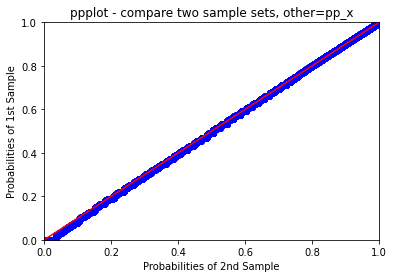

In [67]:
pp_origin.ppplot(line="45", other=pp_median)
plt.title("ppplot - compare two sample sets, other=pp_x")

Text(0.5, 1.0, 'ppplot - compare two sample sets, other=pp_y')

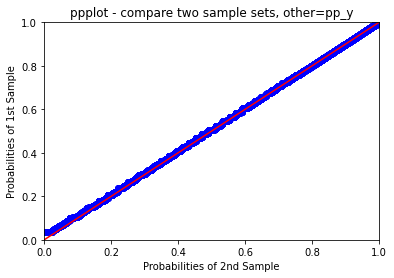

In [68]:
pp_median.ppplot(line="45", other=pp_origin)
plt.title("ppplot - compare two sample sets, other=pp_y")

In [109]:
def probability_plot(col, df_origin, df_impute):
    '''
    Input: 
        col: A list of columns that need to plot
        df_origin: The original dataframe 
        df_impute: The dataframe after missing value imputation
    Output:
        A large graph containing the respective probability plots (origin vs. impute) of the required columns
    '''
#     n = int(np.sqrt(len(col))) + 1
#     fig = plt.figure(figsize=(n*6, n*6))
    r, c = len(col) // 4 + 1, 4
    fig = plt.figure(figsize=(c*8, r*8))
    for i in range(len(col)):   
        feature = col[i]
        pp_origin = sm.ProbPlot(df_origin[feature].dropna(), fit=True)
        pp_impute = sm.ProbPlot(df_impute[feature], fit=True)
        ax = fig.add_subplot(r, c, i+1)
        pp_origin.ppplot(line="45", other=pp_impute, ax=ax)
        plt.title(f"{feature}, origin vs. impute")

    plt.tight_layout()

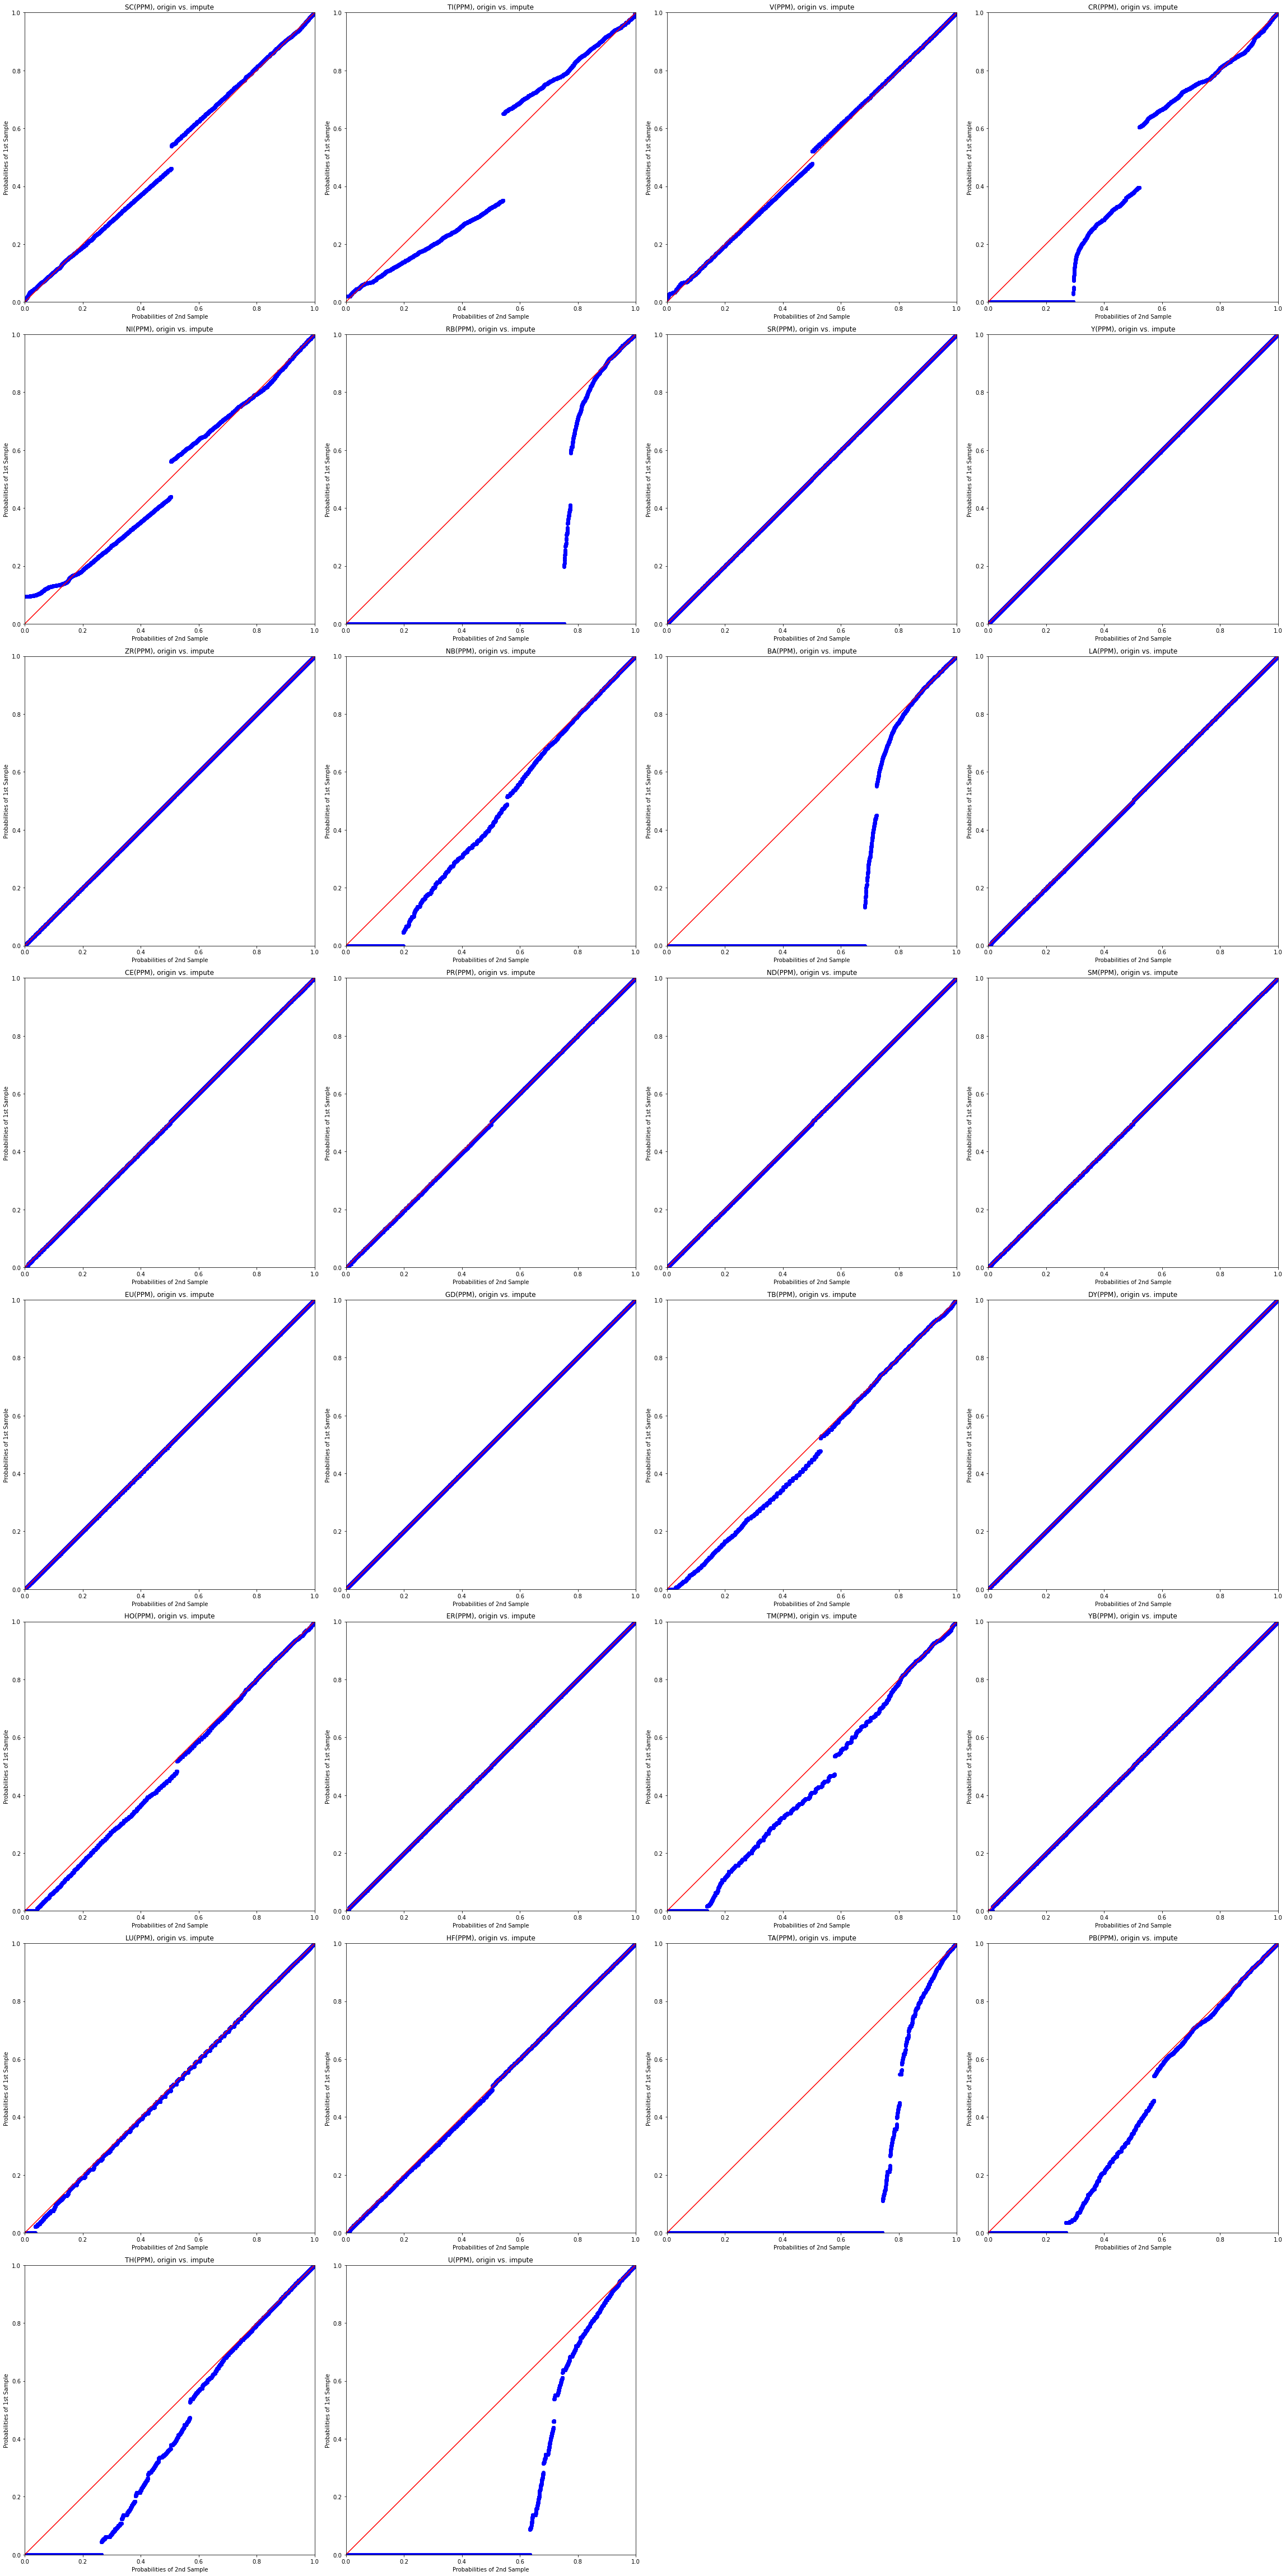

In [110]:
probability_plot(test_cols, df_miss, df_miss_median)

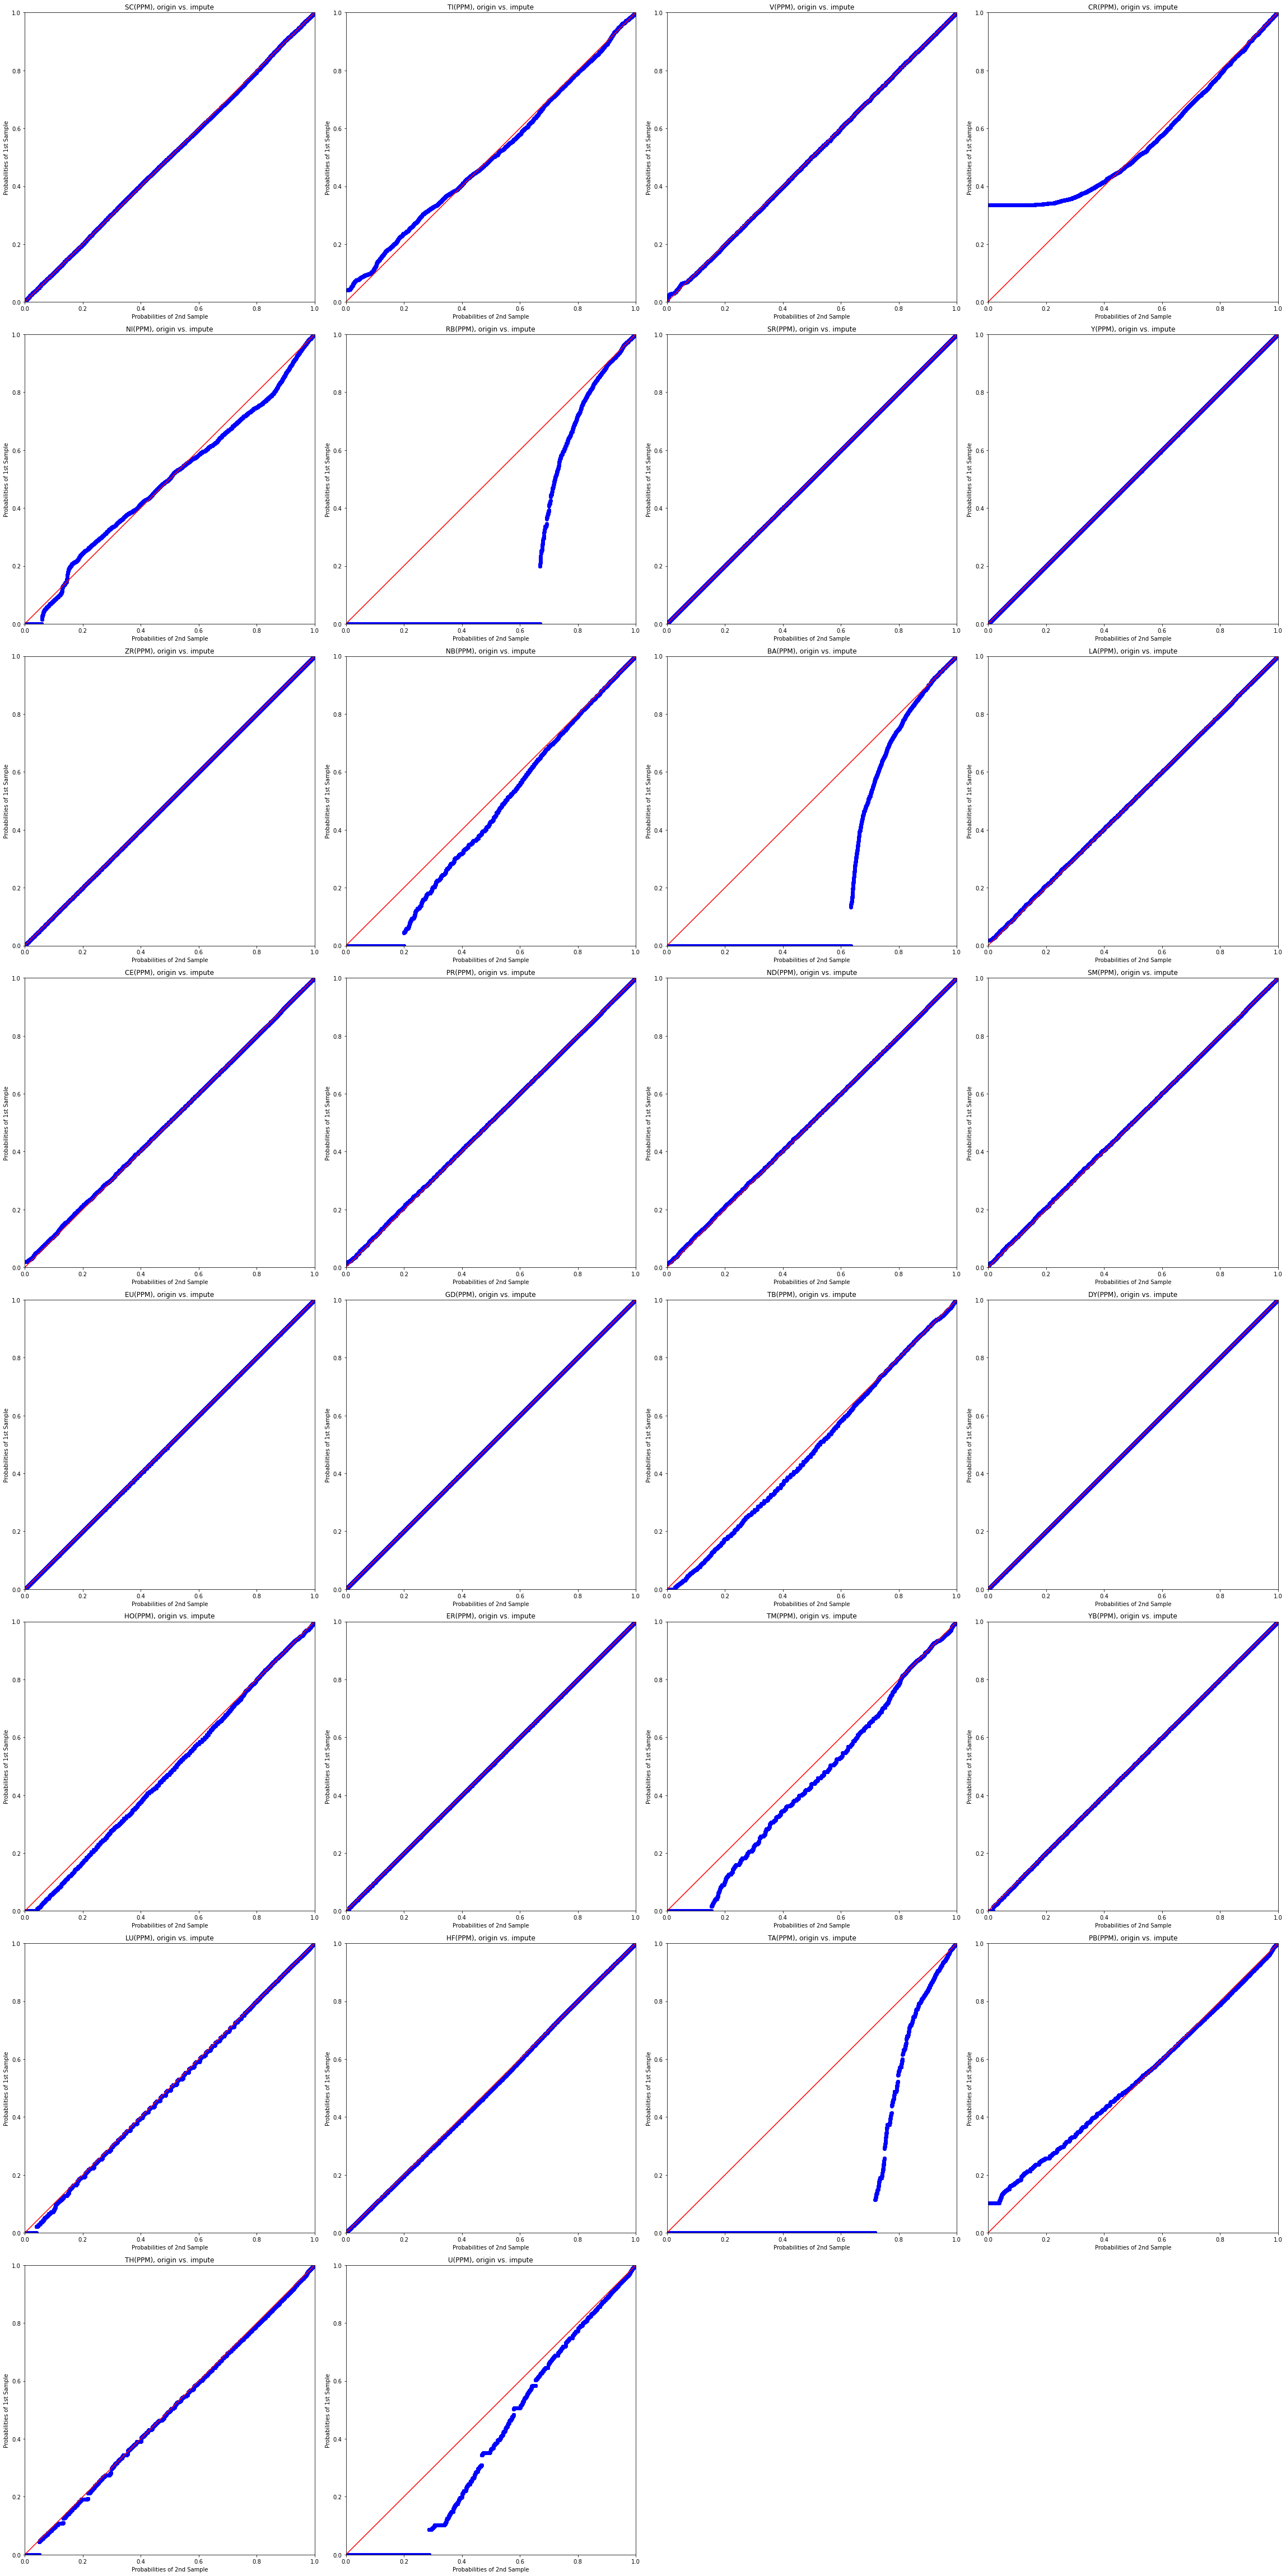

In [111]:
probability_plot(test_cols, df_miss, df_miss_knn)